# Internal model control simulations for autonomous cars and rovers
## V. Venkatesh

In this work, we design a "PID" controller based on internal model control (IMC) tuning rules. Numerical solutions to the equation of motion are employed to compute proportional and integral gains. The differential equation solver in Scipy forms the crux of the methodology herein. The approach involves solving for acceleration balance according to <br>
$\Sigma F = m\frac{dv}{dt}$ <br>

The forces considered herein are drag and car/rover momentum as below <br>
$\frac{dv}{dt} = \frac{1}{m} \Big(F_p u - \frac{1}{2}C_d \rho A v^2\Big)$

where

Variable | Meaning
-----    |-----
m| Mass of car/rover (kg)
v| Velocity (m/s)
t| Time (s)
$C_d$ | Drag coefficient
$\rho$ | Density of air (km/m^3)
A    | Cross-sectional area
$F_p$ | Thrust coefficient in Newton/input

In [6]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
from scipy.integrate import odeint

31.9438277457437
1.277753109829748
20.12461147981853


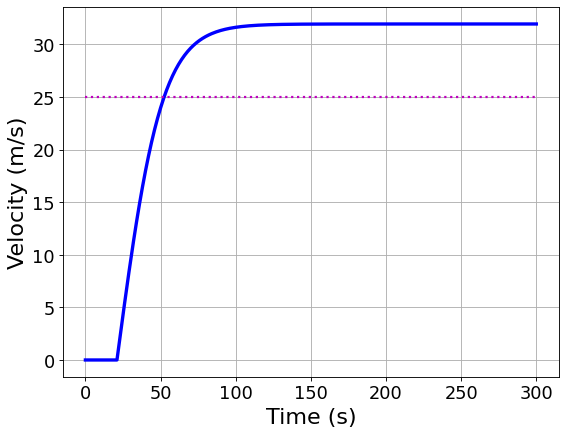

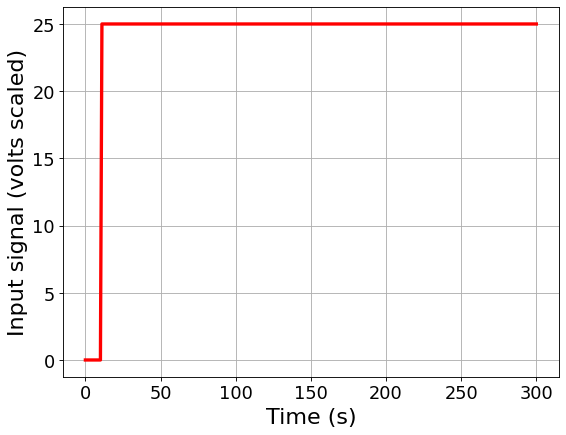

In [8]:
# Define a function that computes acceleration for a car
def car(v, t, u, load):
    # Inputs
    # v - Speed of car in m/s
    # t - Time in seconds
    # u - Drive control signal fed to electric motor
    # load - Weight of passengers in the car
    Cd  = 0.24     # Drag coefficient
    rho = 1.225    # Density of air in kg/m^3
    A   = 5.0      # Cross-sectional area in m^2 that cuts through wind during motion
    Fp  = 30.0     # Thrust parameter in N/V
    m   = 500.0    # Mass of car in kg

    # Calculate acceleration
    dv_by_dt = (1.0/(m+load)) * ((Fp * u) - (0.5*rho*Cd*A*(v**2)))
    return dv_by_dt

# Initialization
tf = 300
nsteps = 301
delta_t = tf / (nsteps-1)
ts = np.linspace(0, tf, nsteps)

# Simulate step input to linear system
# Input  - step
# Initial velocity at time t=0 - v0
step = np.zeros(nsteps)
step[11:] = 25.0
load = 200.0
v0 = 0.0
vs = np.zeros(nsteps) # This variable stores simulated output velocities
                      # and does nothing else

# Simulate response of linear system
# Output - v
for i in np.arange(nsteps-11):
    u = step[i]
    # Limit inputs to be within integer range -50 and 100
    # These numbers map to voltage input levels for motor control
    if (u > 100.0):
        u = 100.0
    elif (u < -50.0):
        u = -50.0
    v = odeint(car, v0, [0, delta_t], args=(u, load))
    v0 = v[-1]
    vs[10+i+1] = v0

# Visualize simulation results
# Plot system response and setpoint
v0=0
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, vs, 'b', linewidth=3, label='Simulated')
plt.plot([0,tf], [25,25], 'm:', linewidth=2, label='Set point desired')
#plt.xlim([30,50])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Velocity (m/s)', fontsize=20)
plt.grid()

# Plot system input to electric motor drive
fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, step, 'r', linewidth=3, label='Simulated')
#plt.xlim([30,50])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled in %)', fontsize=20)
plt.grid()

print(np.max(vs))
print(np.max(vs) / step[-1])
print(0.63*np.max(vs))

Proportional gain <br>
$K_p = \frac{\Delta{y}}{\Delta{u}}$
 $=\frac{31.94}{25}$=1.28

Response delay at start <br>
Delay between start of output $v(t)$ and input $u(t)$
<br> $\theta_p$ = 1

Response time constant <br>
Time taken to reach  $(1 -  \frac{1}{e})*v_{max}(t)$ <br>
$\tau_p = 22.5$

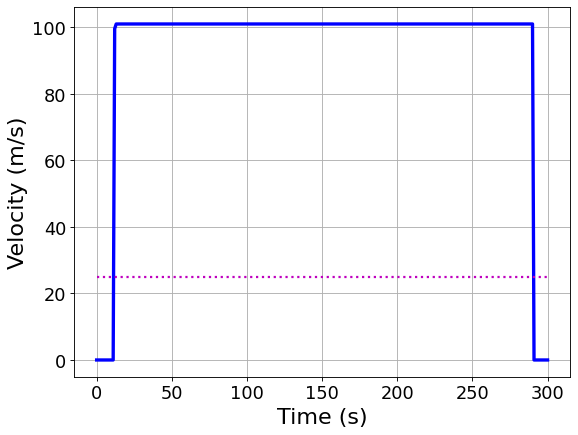

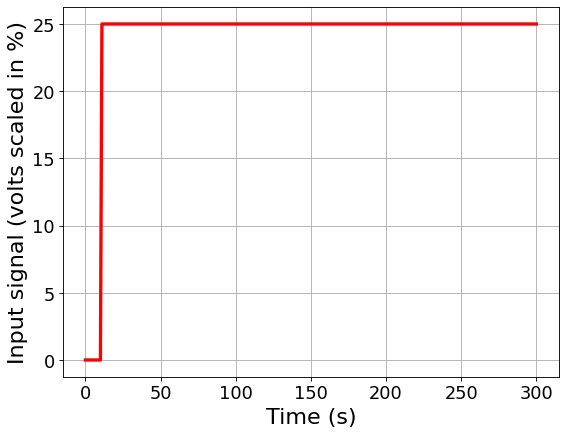

In [11]:
def rover(v, t, u, load):
    # Inputs
    # v - Speed of car in m/s
    # t - Time in seconds
    # u - Drive control signal fed to electric motor
    # load - Weight of passengers in the car
    Cd  = 0.24     # Drag coefficient
    rho = 1.225    # Density of air in kg/m^3
    A   = 0.5      # Cross-sectional area in m^2 that cuts through wind during motion
    Fp  = 30.0     # Thrust parameter in N/V
    m   = 2.0      # Mass of car in kg
    g   = 9.8      # Gravitational force in m/s^2
    mk  = 0.6      # Friction coefficient

    # Calculate acceleration
    dv_by_dt = (1.0/(m+load)) * ((Fp * u) - (0.5*rho*Cd*A*(v**2)))
    return dv_by_dt

# Initialization
tf = 300
nsteps = 301
delta_t = tf / (nsteps-1)
ts = np.linspace(0, tf, nsteps)

# Simulate step input to linear system
# Input  - step
# Initial velocity at time t=0 - v0
step = np.zeros(nsteps)
step[11:] = 25.0
load = 1.0
v0 = 0.0
vs = np.zeros(nsteps) # This variable stores simulated output velocities
                      # but does nothing else

# Simulate response of linear system
# Output - v
for i in np.arange(nsteps-11):
    u = step[i]
    # Limit inputs to be within integer range -50 and 100
    # These numbers map to voltage input levels for motor control
    if (u > 100.0):
        u = 100.0
    elif (u < -50.0):
        u = -50.0
    v = odeint(rover, v0, [0, delta_t], args=(u, load))
    v0 = v[-1]
    vs[i+1] = v0

# Visualize simulation results
# Plot system response and setpoint
v0=0
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, vs, 'b', linewidth=3, label='Simulated')
plt.plot([0,tf], [25,25], 'm:', linewidth=2, label='Set point desired')
#plt.xlim([20,30])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Velocity (m/s)', fontsize=20)
plt.grid()

# Plot system input to electric motor drive
fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, step, 'r', linewidth=3, label='Simulated')
#plt.xlim([20,30])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled in %)', fontsize=20)
plt.grid()


Proportional gain <br>
$K_p = \frac{\Delta{y}}{\Delta{u}}$
 $=\frac{100}{25}$=4

Response delay at start <br>
Delay between start of output $v(t)$ and input $u(t)$
<br> $\theta_p$ = 11

Response time constant <br>
Time taken to reach  $(1 -  \frac{1}{e})*v_{max}(t)$ <br>
$\tau_p = 11.5$

We use the above coefficients to design an autonomous control system defined by <br>
$e(t) = Set_{point} - y(t)$ <br>

The input signal $u(t)$ is synthesized using $e(t)$ using the "PID" relationship below <br>
$u(t) = u_{bias} + K_c e(t) + \frac{K_c}{\tau_i}\Sigma_{i=1}^{N}e_i(t) \Delta{t} + K_c \tau_D \frac{e_i(t) - e_{i-1}(t)}{\Delta{t}}$

where $K_c = \frac{1}{K_p} \Big(\frac{\tau_p}{\theta_p + \tau_c}\Big)$ and $\tau_i = \tau_p$

Internal Model Control (IMC) tuning correlation rules determine the overarching range of $\tau_c$ <br>


Philosophy | $\tau_c$ rule
-----|-----
Aggressive| max($0.1\tau_p$,$0.8\theta_p$)
Moderate| max($\tau_p$,$8\theta_p$)
Conservative|max($10\tau_p$,$10\theta_p$)

Equation of motion simulations for objects with large mass show dead-time to be neglegibile. Further, since $\tau_p \approx \theta_p$, the PID coefficients reduce to <br>
$K_c = \frac{1}{\tau_p}$ <br>
$\tau_i = \tau_p$ <br>

For autonomous cars, we use the results shown above to obtain <br>
$\tau_i = 11.5$ <br>
$K_c = \frac{11.5}{\lambda \tau_c}$ <br>

We run further simulations to investigate performance corresponding to
$K_c = 0.833$ for autonomous cars.

For small rovers, simulations show that dead-time is significant. The internal model control choice is made according to <br>
$K_c = \frac{\tau_p + 0.5 \theta_p}{\lambda K_p}$ <br>
$\tau_i = \tau_p + 0.5 \theta_p$

$K_c = \frac{4.4375}{\lambda}$ <br>
$\tau_i = 17.75$ <br>

Differential gains are omitted altogether in this work because of its increased sensitivity to noise.